In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as graphs
from sklearn.ensemble import RandomForestClassifier

In [2]:
def readXY(index):
    index = str(index)
    if len(index) == 1:
        index = '0' + index
    trainTemp = pd.read_csv("data/" + index + "_" + "train.csv")
    trainX = trainTemp[trainTemp.columns[:-1]].loc[:].values
    trainY = trainTemp[trainTemp.columns[-1]].loc[:].values
    
    testTemp = pd.read_csv("data/" + index + "_" + "test.csv")
    testX = testTemp[testTemp.columns[:-1]].loc[:].values
    testY = testTemp[testTemp.columns[-1]].loc[:].values
    return trainX, trainY, testX, testY

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
n = 21
max_depth = 15
crits = ["gini", "entropy"]
splittings = ["random", "best"]
depths = []
for i in range(max_depth):
    depths.append(i + 1)

bestTrees = []

for i in range(n):
    print("Processing file #", end='')
    print(i + 1)
    maxAcc = 0
    maxParams = ("", "", 0)
    fileIndex = i + 1
    file = readXY(fileIndex) #trainX, trainY, testX, testY
    curTrainX = file[0]
    curTrainY = file[1]
    curTestX = file[2]
    curTestY = file[3]
    for crit in crits:
        for splitting in splittings:
            for depth in depths:
                tree = DecisionTreeClassifier(criterion = crit, splitter = splitting, max_depth = depth)
                tree.fit(curTrainX, curTrainY)
                yPredicted = tree.predict(curTestX)
                yTrue = curTestY
                curAcc = accuracy_score(yTrue, yPredicted)
                if (curAcc > maxAcc):
                    maxAcc = curAcc
                    maxParams = (crit, splitting, depth)
    bestTrees.append((maxAcc, maxParams))

Processing file #1
Processing file #2
Processing file #3
Processing file #4
Processing file #5
Processing file #6
Processing file #7
Processing file #8
Processing file #9
Processing file #10
Processing file #11
Processing file #12
Processing file #13
Processing file #14
Processing file #15
Processing file #16
Processing file #17
Processing file #18
Processing file #19
Processing file #20
Processing file #21


In [4]:
maxAnsDepth = 0
minAnsDepth = 100
ind = 0
for pair in bestTrees:
    ind += 1
    if (pair[1][2] >= maxAnsDepth):
        maxAnsDepth = pair[1][2]
        treeWithMaxDepth = ind
    if (pair[1][2] <= minAnsDepth):
        minAnsDepth = pair[1][2]
        treeWithMinDepth = ind
print (minAnsDepth, maxAnsDepth)

1 11


# Graphic for tree with min optimal depth

In [5]:
#only 2 classes
#x = acc, y = depth
minAccsGraph = []
minDepthsGraph = []
file = readXY(treeWithMinDepth) #trainX, trainY, testX, testY
curTrainX = file[0]
curTrainY = file[1]
curTestX = file[2]
curTestY = file[3]
params = bestTrees[treeWithMinDepth - 1][1]
for i in range(50):
    depth = i + 1
    tree = DecisionTreeClassifier(criterion = params[0], splitter = params[1], max_depth = depth)
    tree.fit(curTrainX, curTrainY)
    yPredicted = tree.predict(curTestX)
    yTrue = curTestY
    curAcc = accuracy_score(yTrue, yPredicted)
    minAccsGraph.append(curAcc)
    minDepthsGraph.append(depth)

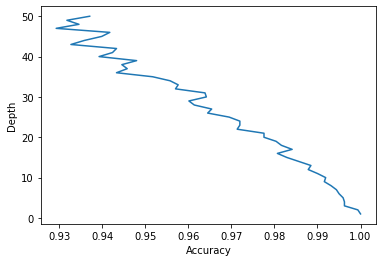

In [6]:
graphs.plot(minAccsGraph, minDepthsGraph)
graphs.xlabel('Accuracy')
graphs.ylabel('Depth')
graphs.show()

# Graphic for tree with max optimal depth

In [7]:
#x = acc, y = depth
maxAccsGraph = []
maxDepthsGraph = []
file = readXY(treeWithMaxDepth) #trainX, trainY, testX, testY
curTrainX = file[0]
curTrainY = file[1]
curTestX = file[2]
curTestY = file[3]
params = bestTrees[treeWithMaxDepth - 1][1]
for i in range(15):
    depth = i + 1
    tree = DecisionTreeClassifier(criterion = params[0], splitter = params[1], max_depth = depth)
    tree.fit(curTrainX, curTrainY)
    yPredicted = tree.predict(curTestX)
    yTrue = curTestY
    curAcc = accuracy_score(yTrue, yPredicted)
    maxAccsGraph.append(curAcc)
    maxDepthsGraph.append(depth)

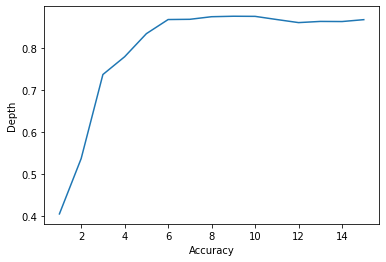

In [30]:
graphs.plot(maxDepthsGraph, maxAccsGraph)
graphs.xlabel('Accuracy')
graphs.ylabel('Depth')
graphs.show()

In [28]:
forest = []
for i in range(n):
    forest.append([])
    print("Processing file #", end='')
    print(i + 1)
    fileIndex = i + 1
    file = readXY(fileIndex) #trainX, trainY, testX, testY
    curTrainX = file[0]
    curTrainY = file[1]
    curTestX = file[2]
    curTestY = file[3]
    for crit in crits:
        tree = RandomForestClassifier(n_estimators = 5, criterion = crit)
        tree.fit(curTrainX, curTrainY)
        yPredicted = tree.predict(curTestX)
        yTrue = curTestY
        curAcc = accuracy_score(yTrue, yPredicted)
        forest[i].append((curAcc, crit))

Processing file #1
Processing file #2
Processing file #3
Processing file #4
Processing file #5
Processing file #6
Processing file #7
Processing file #8
Processing file #9
Processing file #10
Processing file #11
Processing file #12
Processing file #13
Processing file #14
Processing file #15
Processing file #16
Processing file #17
Processing file #18
Processing file #19
Processing file #20
Processing file #21


In [29]:
preTable = []
indeces = []
name1 = forest[0][0][1]
name2 = forest[0][1][1]
for i in range(n):
    indeces.append(i + 1)
    preTable.append([forest[i][0][0], forest[i][1][0]])
table = pd.DataFrame(preTable, index = indeces, columns = [name1, name2])
table

,gini,entropy
1,0.992547,0.990234
2,0.374046,0.279644
3,0.993250,0.954195
4,0.792348,0.773565
5,0.993506,0.987013
6,0.881898,0.869205
7,0.832558,0.847442
8,0.975052,0.970894
9,0.500000,0.570588
10,0.974245,0.974245
